In [11]:
from lma.jupyter.setupJupyter import setupJupyter; setupJupyter(plotStyle='paper', plotDpi=150) #plotTheme='light',
import h5py
from pathlib import Path
import numpy as np
import matplotlib as mpl
import scipy as sp
import scipy.stats as sps

from lma.src.helper import statsHelper as stshlp

In [12]:
stshlp.NormalZ(.95)

1.959963984540054

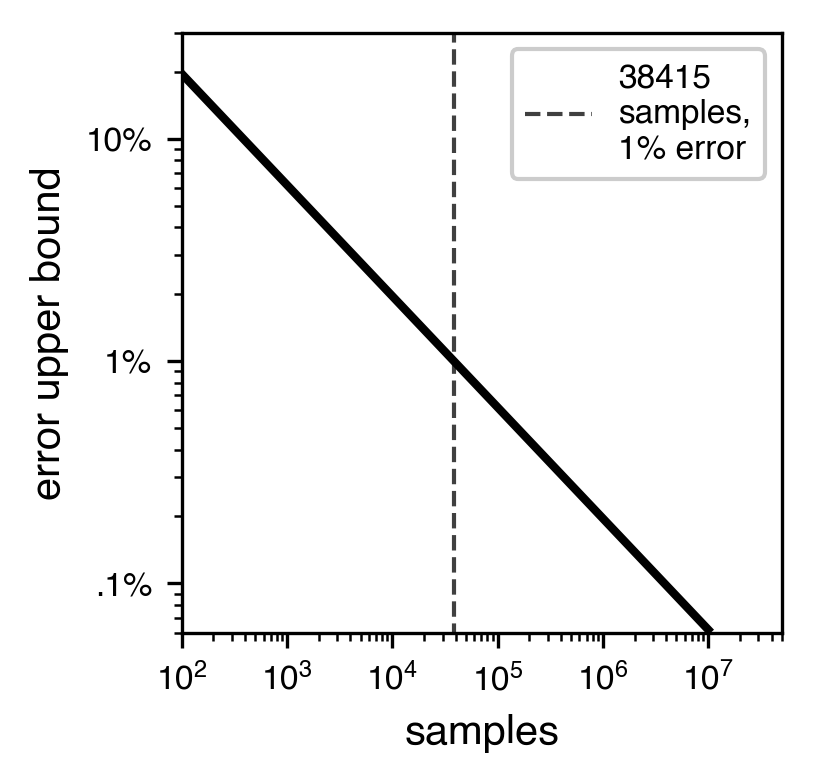

In [64]:
def approximate(samples, alpha=.95):
    return stshlp.NormalZ(alpha)/samples**.5

def approximate_inv(err, alpha=.95):
    return (stshlp.NormalZ(alpha)/err)**2

def exact(samples, alpha=.95):
    alpha = 1 - alpha
    return 1 - 2*samples/sps.chi2.ppf(1 - alpha/2, 2*samples)

x = np.logspace(-1.5,7)
fig,ax = ph.figAx()

# ax.plot(x, approximate(x), label='approximate 95' + r'$\%$' + ' confidence interval')
# ax.plot(x, exact(x, .01), label='exact 99' + r'$\%$' + ' confidence interval')

ax.plot(x, approximate(x), lw=2, c='k') #label='exact 95' + r'$\%$' + ' confidence interval'

nerrone = int(np.ceil(approximate_inv(.01)))
ax.vlines(nerrone, 0, 1, linestyles=['dashed'], alpha=.75, label=f'{nerrone}\nsamples,\n1% error')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e2,5e7)
ax.set_ylim(6e-4, 3e-1)

ax.yaxis.set_major_formatter(ph.percent_log_formatter)

# ax.set_title('Error vs Observations from\nExponential Distribution')
ax.set_xlabel('samples')
ax.set_ylabel('error upper bound')
# ax.set_ylabel('error in exponential estimator\n(95% confidence)')
ax.legend(prop={'size': 8})  #loc='lower center')
# ax.grid()

ph.savefig(fig, 'sampling_error_mean_of_exponential', '../../figures/');

In [65]:
print(int(np.ceil(approximate_inv(.01))))
print(int(np.ceil(approximate_inv(.1))))

38415
385


In [7]:
sp.special

<module 'scipy.special' from '/usr/local/lib/python3.6/site-packages/scipy/special/__init__.py'>

In [10]:
sp.optimize

<module 'scipy.optimize' from '/usr/local/lib/python3.6/site-packages/scipy/optimize/__init__.py'>